In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from pandasql import sqldf
from scipy import stats
from scipy.special import boxcox, inv_boxcox
import pickle
pysqldf = lambda q: sqldf(q, globals())

In [2]:
import os
os.getcwd()
os.chdir("C:\\Users\\Home\\Desktop\\Saptha\\Machine-Learning")

In [3]:
# Invoke garbage collector in python
import gc 

In [4]:
# Importing input Datasets

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

# EDA

In [5]:
print (train.head())
print ("Train data's shape {}".format(str(train.shape)))
print (test.head())
print ("Test data's shape {}".format(str(test.shape)))

  application_date  segment  branch_id        state  zone  case_count
0       2017-04-01        1        1.0  WEST BENGAL  EAST        40.0
1       2017-04-03        1        1.0  WEST BENGAL  EAST         5.0
2       2017-04-04        1        1.0  WEST BENGAL  EAST         4.0
3       2017-04-05        1        1.0  WEST BENGAL  EAST       113.0
4       2017-04-07        1        1.0  WEST BENGAL  EAST        76.0
Train data's shape (80402, 6)
   id application_date  segment
0   1       2019-07-06        1
1   2       2019-07-07        1
2   3       2019-07-08        1
3   4       2019-07-09        1
4   5       2019-07-10        1
Test data's shape (180, 3)


In [6]:
print ('Analysis of data types')
print (train.info())

# convert application_date to date time object
train['application_date'] = pd.to_datetime(train['application_date'], format='%Y-%m-%d')

Analysis of data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null object
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB
None


In [7]:
'''
For business segment 1, historical data has been made available at branch ID level.
For business segment 2, historical data has been made available at State level.
'''

print ('segment 1')
print (train[train['segment']==1].head())
print ('segment 2')
print (train[train['segment']==2].head())

segment 1
  application_date  segment  branch_id        state  zone  case_count
0       2017-04-01        1        1.0  WEST BENGAL  EAST        40.0
1       2017-04-03        1        1.0  WEST BENGAL  EAST         5.0
2       2017-04-04        1        1.0  WEST BENGAL  EAST         4.0
3       2017-04-05        1        1.0  WEST BENGAL  EAST       113.0
4       2017-04-07        1        1.0  WEST BENGAL  EAST        76.0
segment 2
      application_date  segment  branch_id  state zone  case_count
66898       2017-04-01        2        NaN  ASSAM  NaN         0.0
66899       2017-04-02        2        NaN  ASSAM  NaN         0.0
66900       2017-04-03        2        NaN  ASSAM  NaN         0.0
66901       2017-04-04        2        NaN  ASSAM  NaN         0.0
66902       2017-04-05        2        NaN  ASSAM  NaN         0.0


In [8]:
print ('State distribution')
print (train['state'].value_counts())

print ('                                ')
print ('Zone')
print (train['zone'].value_counts())

print ('                                ')
print ('Segment level state distribution')
print ('                                ')
print ('Segment 1')
print (train[train['segment']==1].state.value_counts())
print ('                                ')
print ('Segment 2')
print (train[train['segment']==2].state.value_counts())

State distribution
MAHARASHTRA       11322
GUJARAT            7292
WEST BENGAL        7292
UTTAR PRADESH      6486
TAMIL NADU         6486
PUNJAB             4874
ANDHRA PRADESH     4836
ASSAM              4068
HARYANA            4068
ORISSA             3262
BIHAR              3262
KARNATAKA          3262
TRIPURA            2456
JHARKHAND          2456
MADHYA PRADESH     1650
KERALA             1650
CHHATTISGARH       1650
TELANGANA          1612
UTTARAKHAND        1612
DELHI               806
Name: state, dtype: int64
                                
Zone
EAST       21762
SOUTH      18538
WEST       16926
NORTH       8060
CENTRAL     1612
Name: zone, dtype: int64
                                
Segment level state distribution
                                
Segment 1
MAHARASHTRA       10478
GUJARAT            6448
WEST BENGAL        6448
UTTAR PRADESH      5642
TAMIL NADU         5642
ANDHRA PRADESH     4836
PUNJAB             4030
ASSAM              3224
HARYANA            3224
OR

In [9]:
'''
Segment 2 has equal number of records in each state. Is it a pattern or data was wantedly given like that?????
'''

'\nSegment 2 has equal number of records in each state. Is it a pattern or data was wantedly given like that?????\n'

In [10]:
# check if train data is shuffled.

print (train.segment.value_counts())
print (train.iloc[0:66898,:].segment.value_counts())
print (train.iloc[66898:,:].segment.value_counts())

1    66898
2    13504
Name: segment, dtype: int64
1    66898
Name: segment, dtype: int64
2    13504
Name: segment, dtype: int64


In [11]:
'''
So the train data is arranged in terms of Segment. 
First 66898 records are of Segment type 1.
Last 13504 records are of Segment type 2.

Need to consider this while spitting train, CV & test data during model building phase.
'''

'\nSo the train data is arranged in terms of Segment. \nFirst 66898 records are of Segment type 1.\nLast 13504 records are of Segment type 2.\n\nNeed to consider this while spitting train, CV & test data during model building phase.\n'

Text(0, 0.5, 'case count')

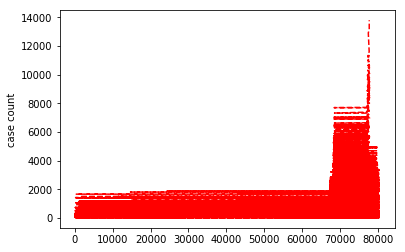

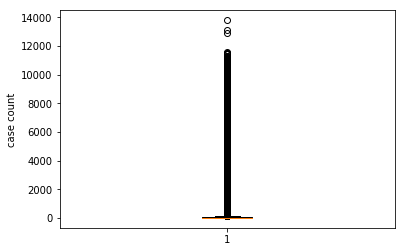

In [12]:
# See output distribution
cc_sort = train.sort_values(by = ['case_count'])
plt.figure()
plt.plot(cc_sort.case_count,'--r')
plt.ylabel('case count')

plt.figure()
plt.boxplot(cc_sort.case_count)
plt.ylabel('case count')

Clearly case count values in Segment 2 is greater than Segment 1


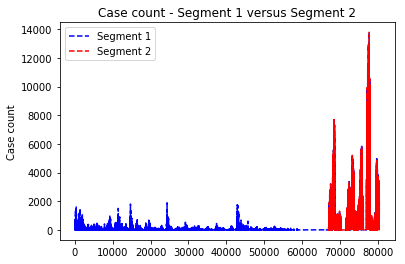

In [13]:
plt.figure()
plt.title('Case count - Segment 1 versus Segment 2')
plt.plot(train.case_count,'--b', train[train['segment']==2].case_count, '--r')
plt.legend(['Segment 1','Segment 2'])
plt.ylabel('Case count')


print ('Clearly case count values in Segment 2 is greater than Segment 1')


Text(0, 0.5, 'Case count')

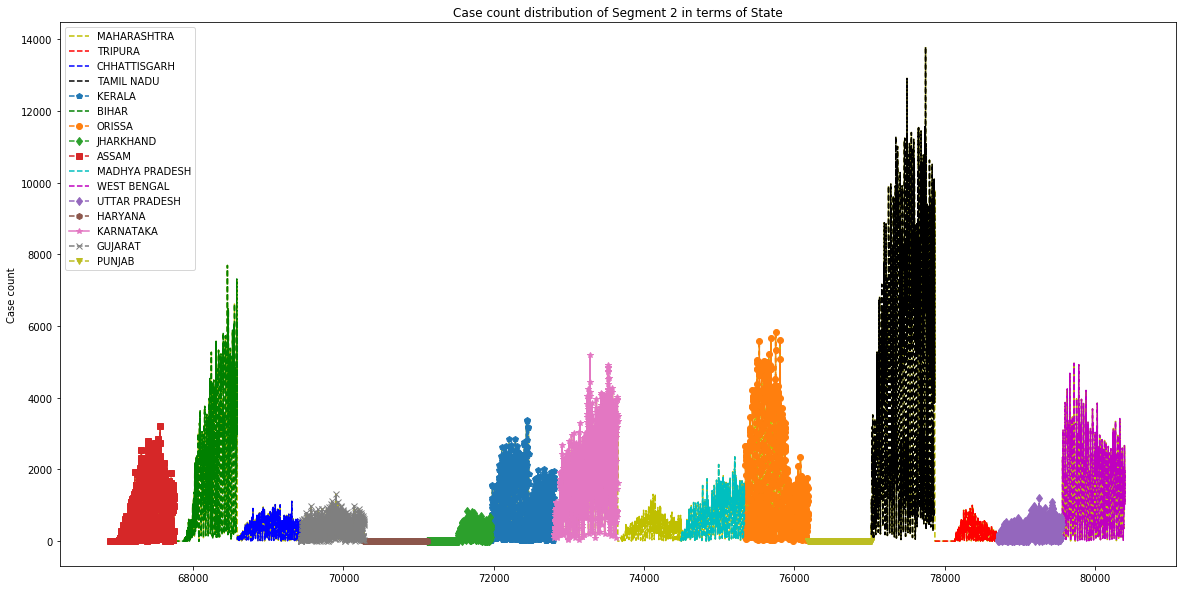

In [14]:

plt.figure(figsize=(20,10))
plt.title('Case count distribution of Segment 2 in terms of State')
plt.plot(train[train['segment']==2].case_count, '--y', train[(train['segment']==2) & (train['state']=='TRIPURA')].case_count, '--r',
        train[(train['segment']==2) & (train['state']=='CHHATTISGARH')].case_count, '--b', train[(train['segment']==2) & (train['state']=='TAMIL NADU')].case_count, '--k',
        train[(train['segment']==2) & (train['state']=='KERALA')].case_count, '--p',train[(train['segment']==2) & (train['state']=='BIHAR')].case_count, '--g',
        train[(train['segment']==2) & (train['state']=='ORISSA')].case_count, '--o',train[(train['segment']==2) & (train['state']=='JHARKHAND')].case_count, '--d'
        ,train[(train['segment']==2) & (train['state']=='ASSAM')].case_count, '--s', 
        train[(train['segment']==2) & (train['state']=='MADHYA PRADESH')].case_count, '--c',
        train[(train['segment']==2) & (train['state']=='WEST BENGAL')].case_count, '--m',
        train[(train['segment']==2) & (train['state']=='UTTAR PRADESH')].case_count, '--d'
        ,train[(train['segment']==2) & (train['state']=='HARYANA')].case_count, '--h',
        train[(train['segment']==2) & (train['state']=='KARNATAKA')].case_count, '-*',
        train[(train['segment']==2) & (train['state']=='GUJARAT')].case_count, '--x',
        train[(train['segment']==2) & (train['state']=='PUNJAB')].case_count, '--v',)
plt.legend(['MAHARASHTRA','TRIPURA','CHHATTISGARH','TAMIL NADU','KERALA','BIHAR','ORISSA','JHARKHAND','ASSAM','MADHYA PRADESH',
            'WEST BENGAL','UTTAR PRADESH','HARYANA','KARNATAKA','GUJARAT','PUNJAB'],loc = 2)
plt.ylabel('Case count')

In [15]:
'''
Definitely there is variation in case count distribution because of state in segment 2. However we also need to analyse seasonal changes.

PUNJAB and HARAYANA almost have zero case count throughout the whole period.

'''

'\nDefinitely there is variation in case count distribution because of state in segment 2. However we also need to analyse seasonal changes.\n\nPUNJAB and HARAYANA almost have zero case count throughout the whole period.\n\n'

In [16]:
train[train['segment'] == 1].groupby(['state']).agg({'case_count':np.average}).reset_index().sort_values(by=['case_count'])

,state,case_count
0,ANDHRA PRADESH,3.517370
6,HARYANA,3.736973
3,CHHATTISGARH,3.968983
17,UTTAR PRADESH,4.251152
9,KERALA,11.795285
13,PUNJAB,18.079156
14,TAMIL NADU,22.158632
7,JHARKHAND,22.158809
2,BIHAR,22.780397
18,UTTARAKHAND,24.782258


In [17]:
train[train['segment'] == 2].groupby(['state']).agg({'case_count':np.average}).reset_index().sort_values(by=['case_count'])

,state,case_count
4,HARYANA,0.000000
11,PUNJAB,0.000000
5,JHARKHAND,158.571090
13,TRIPURA,177.534360
14,UTTAR PRADESH,306.938389
9,MAHARASHTRA,340.305687
3,GUJARAT,346.502370
2,CHHATTISGARH,350.644550
8,MADHYA PRADESH,641.349526
0,ASSAM,764.234597


##  EDA + BASIC MODEL BUILDING

In [18]:
train_date_segment_1 = train[train['segment'] == 1].groupby(['application_date']).agg({'case_count':np.sum}).reset_index()
train_date_segment_1['segment'] = 1
train_date_segment_2 = train[train['segment'] == 2].groupby(['application_date']).agg({'case_count':np.sum}).reset_index()
train_date_segment_2['segment'] = 2
train_model_dummy = pd.concat([train_date_segment_1,train_date_segment_2])

In [19]:
train_model_dummy['application_date'] = pd.to_datetime(train_model_dummy['application_date'], format='%Y-%m-%d')
train_model_dummy['month'] = train_model_dummy.application_date.dt.month
train_model_dummy['day'] = train_model_dummy.application_date.dt.day
train_model_dummy['year'] = train_model_dummy.application_date.dt.year
train_model_dummy['month_day'] = train_model_dummy['month']*100 + train_model_dummy['day']

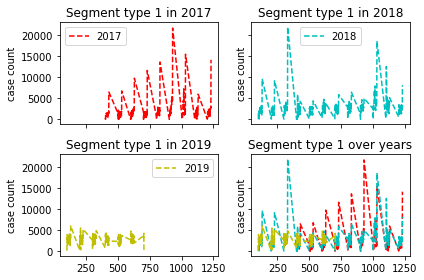

In [20]:
fig, ((plt1,plt2),(plt3,plt4)) = plt.subplots(2,2, sharex=True, sharey=True)
plt1.plot(train_model_dummy[(train_model_dummy['year'] == 2017) & (train_model_dummy['segment'] == 1)].month_day, train_model_dummy[(train_model_dummy['year'] == 2017) & (train_model_dummy['segment'] == 1)].case_count, '--r')
plt2.plot(train_model_dummy[(train_model_dummy['year'] == 2018) & (train_model_dummy['segment'] == 1)].month_day, train_model_dummy[(train_model_dummy['year'] == 2018) & (train_model_dummy['segment'] == 1)].case_count, '--c')
plt3.plot(train_model_dummy[(train_model_dummy['year'] == 2019) & (train_model_dummy['segment'] == 1)].month_day, train_model_dummy[(train_model_dummy['year'] == 2019) & (train_model_dummy['segment'] == 1)].case_count, '--y')
plt4.plot(train_model_dummy[(train_model_dummy['year'] == 2017) & (train_model_dummy['segment'] == 1)].month_day, train_model_dummy[(train_model_dummy['year'] == 2017) & (train_model_dummy['segment'] == 1)].case_count, '--r',
         train_model_dummy[(train_model_dummy['year'] == 2018) & (train_model_dummy['segment'] == 1)].month_day, train_model_dummy[(train_model_dummy['year'] == 2018) & (train_model_dummy['segment'] == 1)].case_count, '--c',
         train_model_dummy[(train_model_dummy['year'] == 2019) & (train_model_dummy['segment'] == 1)].month_day, train_model_dummy[(train_model_dummy['year'] == 2019) & (train_model_dummy['segment'] == 1)].case_count, '--y')

plt1.legend(['2017'])
plt1.set_title('Segment type 1 in 2017')
plt1.set_ylabel('case count')

plt2.legend(['2018'])
plt2.set_title('Segment type 1 in 2018')
plt2.set_ylabel('case count')

plt3.legend(['2019'])
plt3.set_title('Segment type 1 in 2019')
plt3.set_ylabel('case count')

plt4.set_title('Segment type 1 over years')
plt4.set_ylabel('case count')

fig.tight_layout()

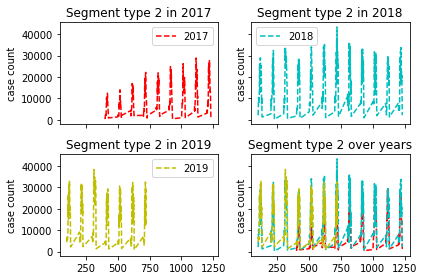

In [21]:
fig, ((plt1,plt2),(plt3,plt4)) = plt.subplots(2,2, sharex=True, sharey=True)
plt1.plot(train_model_dummy[(train_model_dummy['year'] == 2017) & (train_model_dummy['segment'] == 2)].month_day, train_model_dummy[(train_model_dummy['year'] == 2017) & (train_model_dummy['segment'] == 2)].case_count, '--r')
plt2.plot(train_model_dummy[(train_model_dummy['year'] == 2018) & (train_model_dummy['segment'] == 2)].month_day, train_model_dummy[(train_model_dummy['year'] == 2018) & (train_model_dummy['segment'] == 2)].case_count, '--c')
plt3.plot(train_model_dummy[(train_model_dummy['year'] == 2019) & (train_model_dummy['segment'] == 2)].month_day, train_model_dummy[(train_model_dummy['year'] == 2019) & (train_model_dummy['segment'] == 2)].case_count, '--y')
plt4.plot(train_model_dummy[(train_model_dummy['year'] == 2017) & (train_model_dummy['segment'] == 2)].month_day, train_model_dummy[(train_model_dummy['year'] == 2017) & (train_model_dummy['segment'] == 2)].case_count, '--r',
         train_model_dummy[(train_model_dummy['year'] == 2018) & (train_model_dummy['segment'] == 2)].month_day, train_model_dummy[(train_model_dummy['year'] == 2018) & (train_model_dummy['segment'] == 2)].case_count, '--c',
         train_model_dummy[(train_model_dummy['year'] == 2019) & (train_model_dummy['segment'] == 2)].month_day, train_model_dummy[(train_model_dummy['year'] == 2019) & (train_model_dummy['segment'] == 2)].case_count, '--y')

plt1.legend(['2017'])
plt1.set_title('Segment type 2 in 2017')
plt1.set_ylabel('case count')

plt2.legend(['2018'])
plt2.set_title('Segment type 2 in 2018')
plt2.set_ylabel('case count')

plt3.legend(['2019'])
plt3.set_title('Segment type 2 in 2019')
plt3.set_ylabel('case count')

plt4.set_title('Segment type 2 over years')
plt4.set_ylabel('case count')

fig.tight_layout()

In [24]:
# MODEL 1
Pkl_Filename = "saptha.pkl"
X = train_model_dummy.loc[:, ~train_model_dummy.columns.isin(['case_count','application_date'])]
y = train_model_dummy['case_count']

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

# Save the Modle to file in the current working directory
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)


In [25]:
test['application_date'] = pd.to_datetime(test['application_date'], format='%Y-%m-%d')
test['month'] = test.application_date.dt.month
test['day'] = test.application_date.dt.day
test['year'] = test.application_date.dt.year
test['month_day'] = test['month']*100 + test['day']

test_predict= test.loc[:, ~test.columns.isin(['application_date','id'])]
test['case_count'] = regressor.predict(test_predict)
# test.to_csv('sub1.csv')
# RMSE IN LB - 28.9349542579413

del test['case_count']

In [24]:
for col1,col2 in zip(X.columns,regressor.feature_importances_):
    print (str(col1) + ':' + str(col2))

segment:0.4062103837661926
month:0.017416988418679676
day:0.4055601785077944
year:0.09090154767122816
month_day:0.07991090163610512


In [25]:
# MODEL 2
# ADD columns based on trends observed in year wise data plotted for each segment.

segment_case_count = train_model_dummy.groupby(['year','segment']).agg({'case_count':np.average}).reset_index()
segment_case_count.columns = ['year','segment','case_count_average']

train_model_dummy = train_model_dummy.merge(segment_case_count)
test = test.merge(segment_case_count)

In [26]:
X = train_model_dummy.loc[:, ~train_model_dummy.columns.isin(['case_count','application_date'])]
y = train_model_dummy['case_count']

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

test_predict= test.loc[:, ~test.columns.isin(['application_date','id'])]
test['case_count'] = regressor.predict(test_predict)
# test.to_csv('sub2.csv')
# RMSE IN LB - 28.1120085787518

del test['case_count']

In [27]:
for col1,col2 in zip(X.columns,regressor.feature_importances_):
    print (str(col1) + ':' + str(col2))

segment:0.09990079366125157
month:0.01869348524086214
day:0.408260046226199
year:0.02739118850476794
month_day:0.07704007908557661
case_count_average:0.3687144072813427


### FEAT ENGG. + EDA + MODEL BUILDING

In [28]:
# Lets do some feature engineering to understand the variation in case counts for segment type 1
# For segment type 2 throughout the year the graph looks constant in year wise analysis.

In [29]:
# Lets add the GDP variable.

print (train_model_dummy.head())

train_model_dummy['quarter'] = ''
train_model_dummy.loc[train_model_dummy['month'] == 1, 'quarter'] = 'Q1'
train_model_dummy.loc[train_model_dummy['month'] == 2, 'quarter'] = 'Q1'
train_model_dummy.loc[train_model_dummy['month'] == 3, 'quarter'] = 'Q1'
train_model_dummy.loc[train_model_dummy['month'] == 4, 'quarter'] = 'Q2'
train_model_dummy.loc[train_model_dummy['month'] == 5, 'quarter'] = 'Q2'
train_model_dummy.loc[train_model_dummy['month'] == 6, 'quarter'] = 'Q2'
train_model_dummy.loc[train_model_dummy['month'] == 7, 'quarter'] = 'Q3'
train_model_dummy.loc[train_model_dummy['month'] == 8, 'quarter'] = 'Q3'
train_model_dummy.loc[train_model_dummy['month'] == 9, 'quarter'] = 'Q3'
train_model_dummy.loc[train_model_dummy['month'] == 10, 'quarter'] = 'Q4'
train_model_dummy.loc[train_model_dummy['month'] == 11, 'quarter'] = 'Q4'
train_model_dummy.loc[train_model_dummy['month'] == 12, 'quarter'] = 'Q4'

test['quarter'] = ''
test.loc[test['month'] == 1, 'quarter'] = 'Q1'
test.loc[test['month'] == 2, 'quarter'] = 'Q1'
test.loc[test['month'] == 3, 'quarter'] = 'Q1'
test.loc[test['month'] == 4, 'quarter'] = 'Q2'
test.loc[test['month'] == 5, 'quarter'] = 'Q2'
test.loc[test['month'] == 6, 'quarter'] = 'Q2'
test.loc[test['month'] == 7, 'quarter'] = 'Q3'
test.loc[test['month'] == 8, 'quarter'] = 'Q3'
test.loc[test['month'] == 9, 'quarter'] = 'Q3'
test.loc[test['month'] == 10, 'quarter'] = 'Q4'
test.loc[test['month'] == 11, 'quarter'] = 'Q4'
test.loc[test['month'] == 12, 'quarter'] = 'Q4'

# src : https://www.ceicdata.com/en/indicator/india/real-gdp-growth
GDP_DF = pd.DataFrame()
quarter = ['Q2','Q3','Q4','Q1','Q2','Q3','Q4','Q1','Q2','Q3','Q4']
year = [2017,2017,2017,2018,2018,2018,2018,2019,2019,2019,2019]
GDP = [7.04,5.99,6.76,7.68,8.13,7.95,7.00,6.57,5.83,5.01,4.54]
GDP_DF['quarter'] = quarter
GDP_DF['year'] = year
GDP_DF['GDP'] = GDP

train_model_dummy = train_model_dummy.merge(GDP_DF)
test = test.merge(GDP_DF)

  application_date  case_count  segment  month  day  year  month_day  \
0       2017-04-01       299.0        1      4    1  2017        401   
1       2017-04-03        42.0        1      4    3  2017        403   
2       2017-04-04        23.0        1      4    4  2017        404   
3       2017-04-05      1530.0        1      4    5  2017        405   
4       2017-04-07      1341.0        1      4    7  2017        407   

   case_count_average  
0         2074.625483  
1         2074.625483  
2         2074.625483  
3         2074.625483  
4         2074.625483  


In [30]:
#MODEL 3
X = train_model_dummy.loc[:, ~train_model_dummy.columns.isin(['case_count','application_date','quarter'])]
y = train_model_dummy['case_count']

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

test_predict= test.loc[:, ~test.columns.isin(['id','application_date','quarter'])]
test['case_count'] = regressor.predict(test_predict)
# test.to_csv('sub4.csv')
# RMSE IN LB - 38.078956535721

del test['case_count']

In [31]:
for col1,col2 in zip(X.columns,regressor.feature_importances_):
    print (str(col1) + ':' + str(col2))

segment:0.25137703278076884
month:0.013848017908024743
day:0.4067942064635105
year:0.025097571168211742
month_day:0.07488065718831799
case_count_average:0.2104682601507777
GDP:0.01753425434038854


## CROSS VALIDATION OF THE MODELS

In [32]:
print (train_model_dummy.head())

  application_date  case_count  segment  month  day  year  month_day  \
0       2017-04-01       299.0        1      4    1  2017        401   
1       2017-04-03        42.0        1      4    3  2017        403   
2       2017-04-04        23.0        1      4    4  2017        404   
3       2017-04-05      1530.0        1      4    5  2017        405   
4       2017-04-07      1341.0        1      4    7  2017        407   

   case_count_average quarter   GDP  
0         2074.625483      Q2  7.04  
1         2074.625483      Q2  7.04  
2         2074.625483      Q2  7.04  
3         2074.625483      Q2  7.04  
4         2074.625483      Q2  7.04  


In [33]:
#src : https://tradingeconomics.com/india/
inflation_rate = [2.99,2.36,3.58,5.07,4.58,4.17,3.38,1.97,2.99,3.15,4.62]
GDP_DF['inflation_rate'] = inflation_rate

In [34]:
'''
Lets check the skewness of data as prediction is failing at outliers as we see in graphs plotted below.
'''

train_model_dummy.skew(axis = 0, skipna = True) 

'''
skewness = 0 : normally distributed.
skewness > 0 : more weight in the left tail of the distribution.
skewness < 0 : more weight in the right tail of the distribution. 
'''

# Here our target case_count is highly skewed

'\nskewness = 0 : normally distributed.\nskewness > 0 : more weight in the left tail of the distribution.\nskewness < 0 : more weight in the right tail of the distribution. \n'

In [35]:
# Trying different transformations to remove skew

case_count_log = np.log(train_model_dummy['case_count'])
print ('Log Transformation skew {}'.format(case_count_log.skew()))

case_count_sqrt = np.sqrt(train_model_dummy['case_count'])
print ('Square root Transformation skew {}'.format(case_count_sqrt.skew()))

case_count_boxcox = stats.boxcox(train_model_dummy['case_count'])[0]
print ('Box cox Transformation skew {}'.format(pd.Series(case_count_boxcox).skew()))

print ((case_count_sqrt**2).skew())

# Box cox transformation works really good in removing skew

Log Transformation skew -1.3905246581534931
Square root Transformation skew 0.7196734387983768
Box cox Transformation skew 0.005928435094551736
1.2460644238027767


In [36]:
from sklearn.model_selection import KFold

kfold = KFold(5, True, 1)
for trainCV, testCV in kfold.split(train_model_dummy):
    #print('train: %s, test: %s' % (train_model_dummy.iloc[train,:].head(2), train_model_dummy.iloc[test,:].head(2)))
    print('train: %s, test: %s' % (train_model_dummy.iloc[trainCV,:].shape, train_model_dummy.iloc[testCV,:].shape))


train: (1320, 10), test: (330, 10)
train: (1320, 10), test: (330, 10)
train: (1320, 10), test: (330, 10)
train: (1320, 10), test: (330, 10)
train: (1320, 10), test: (330, 10)


               fold_1        fold_2        fold_3        fold_4        fold_5  \
Model_1  3.044769e+03  2.779852e+03  3.350543e+03  2.817224e+03  3.340363e+03   
Model_2  3.055498e+03  2.790167e+03  3.371893e+03  2.865473e+03  3.333587e+03   
Model_3  3.153962e+03  2.831713e+03  3.341454e+03  2.778198e+03  3.391874e+03   
Model_4  3.088711e+03  2.771321e+03  3.334203e+03  2.806103e+03  3.328068e+03   
Model_5  1.715277e+08  1.675560e+08  1.687599e+08  1.683684e+08  1.738030e+08   
Model_6  3.011788e+03  3.058466e+03  3.511449e+03  3.032189e+03  3.349615e+03   

             rmse_avg         LB  
Model_1  3.066550e+03  28.934954  
Model_2  3.083324e+03  28.112009  
Model_3  3.099440e+03  38.078957  
Model_4  3.065681e+03  36.075003  
Model_5  1.700030e+08  71.271449  
Model_6  3.192701e+03        NaN  


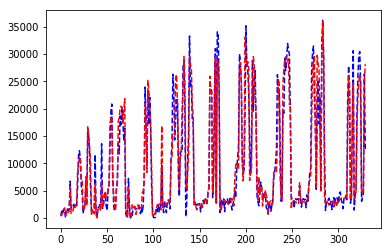

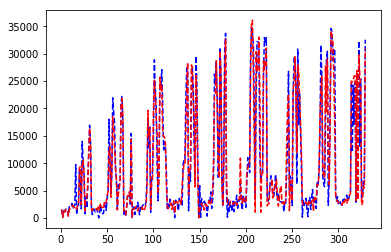

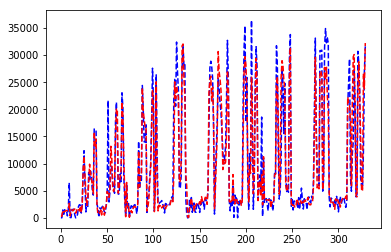

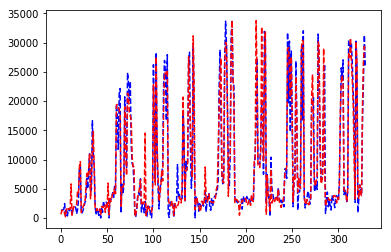

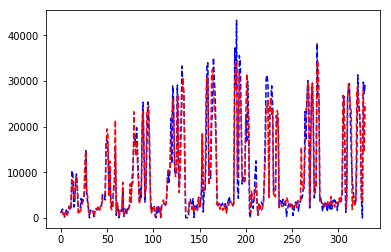

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

RMSE = pd.DataFrame()
fold = 1
model = 1

CV = kfold.split(train_model_dummy)

# To have col name as GDP_CV to train & test data when we merge
GDP_DF['GDP_CV'] = GDP_DF['GDP']
del GDP_DF['GDP']
# To have col name as INFLATION_CV to train & test data when we merge
GDP_DF['INFLATION_CV'] = GDP_DF['inflation_rate']
del GDP_DF['inflation_rate']

for trainCV, testCV in CV:
    
    # Generating columns needed for all the models
    train_model_cv = train_model_dummy.iloc[trainCV,:]
    test_model_cv = train_model_dummy.iloc[testCV,:]
    
    segment_case_count = train_model_cv.groupby(['year','segment']).agg({'case_count':np.average}).reset_index()
    segment_case_count.columns = ['year','segment','case_count_cv_average']
    segment_case_count['no. of quarters used'] = [3,3,4,4,2.3,2.3]

    train_model_cv = train_model_cv.merge(segment_case_count)
    test_model_cv = test_model_cv.merge(segment_case_count)
    
    train_model_cv = train_model_cv.merge(GDP_DF)
    test_model_cv = test_model_cv.merge(GDP_DF)
    
    # y is common for all models
    y = train_model_cv['case_count']
    
    # MODEL 1 
    # LB Score - 28.9349542579413
    
    model_1_columns = ['segment','month','day','year','month_day']
    X = train_model_cv.loc[:, model_1_columns]
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X, y)
    test_model_cv_predict = test_model_cv.loc[:, model_1_columns]
    test_model_cv['case_count_pred'] = regressor.predict(test_model_cv_predict)
    rmse = np.sqrt(mean_squared_error(test_model_cv['case_count'], test_model_cv['case_count_pred']))
    RMSE.loc['Model_{}'.format(str(model)),'fold_{}'.format(str(fold))] = rmse
    
    # plotting residuals versus fitted 
    plt.figure()
    plt.plot(test_model_cv.case_count,'--b',test_model_cv.case_count_pred,'--r')
    
    del test_model_cv['case_count_pred']
    model = model+1
    
    # MODEL 2
    # LB Score - 28.1120085787518
   
    model_2_columns = ['segment','month','day','year','month_day','case_count_cv_average']
    X = train_model_cv.loc[:, model_2_columns]
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X, y)
    test_model_cv_predict = test_model_cv.loc[:, model_2_columns]
    test_model_cv['case_count_pred'] = regressor.predict(test_model_cv_predict)
    rmse = np.sqrt(mean_squared_error(test_model_cv['case_count'], test_model_cv['case_count_pred']))
    RMSE.loc['Model_{}'.format(str(model)),'fold_{}'.format(str(fold))] = rmse
    del test_model_cv['case_count_pred']
    model = model+1
    
    # MODEL 3 
    # Model 3 LB - 38.078956535721
    
    model_3_columns = ['segment','month','day','year','month_day','case_count_cv_average','GDP_CV']
    X = train_model_cv.loc[:, model_3_columns]
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X, y)
    test_model_cv_predict = test_model_cv.loc[:, model_3_columns]
    test_model_cv['case_count_pred'] = regressor.predict(test_model_cv_predict)
    rmse = np.sqrt(mean_squared_error(test_model_cv['case_count'], test_model_cv['case_count_pred']))
    RMSE.loc['Model_{}'.format(str(model)),'fold_{}'.format(str(fold))] = rmse
    del test_model_cv['case_count_pred']
    model = model+1
    
    # MODEL 4 
    # Model 4 LB - 36.0750028123526
    
    model_4_columns = ['segment','month','day','year','month_day','case_count_cv_average','no. of quarters used','INFLATION_CV']
    X = train_model_cv.loc[:, model_4_columns]
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X, y)
    test_model_cv_predict = test_model_cv.loc[:, model_4_columns]
    test_model_cv['case_count_pred'] = regressor.predict(test_model_cv_predict)
    rmse = np.sqrt(mean_squared_error(test_model_cv['case_count'], test_model_cv['case_count_pred']))
    RMSE.loc['Model_{}'.format(str(model)),'fold_{}'.format(str(fold))] = rmse
    del test_model_cv['case_count_pred']
    model = model+1
    
    # MODEL 5
    # RMSE IN LB - 71.2714485705321  
    # The target is skewed, so retried model 1 with square transformation of the target.
    
    model_5_columns = ['segment','month','day','year','month_day']
    X = train_model_cv.loc[:, model_5_columns]
    mod = sm.OLS(y, X).fit()
    test_model_cv_predict = test_model_cv.loc[:, model_5_columns]
    test_model_cv['case_count_pred'] = mod.predict(test_model_cv_predict)
    test_model_cv['case_count_pred'] = test_model_cv['case_count_pred']**2
    rmse = np.sqrt(mean_squared_error(test_model_cv['case_count'], test_model_cv['case_count_pred']))
    RMSE.loc['Model_{}'.format(str(model)),'fold_{}'.format(str(fold))] = rmse
    del test_model_cv['case_count_pred']
    model = model+1
    
    # MODEL 6
    # Lets try model 1 with XGB instead of RF
    
    model_6_columns = ['segment','month','day','year','month_day']
    X = train_model_cv.loc[:, model_6_columns]
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
    xg_reg.fit(X, y)
    test_model_cv_predict = test_model_cv.loc[:, model_6_columns]
    test_model_cv['case_count_pred'] = xg_reg.predict(test_model_cv_predict)
    rmse = np.sqrt(mean_squared_error(test_model_cv['case_count'], test_model_cv['case_count_pred']))
    RMSE.loc['Model_{}'.format(str(model)),'fold_{}'.format(str(fold))] = rmse    
    del test_model_cv['case_count_pred']
    model = model+1
    
    fold = fold+1
    model = 1

GDP_DF['GDP'] = GDP_DF['GDP_CV']
GDP_DF['inflation_rate'] = GDP_DF['INFLATION_CV']

RMSE['rmse_avg'] = RMSE['fold_1'] + RMSE['fold_2'] + RMSE['fold_3'] + RMSE['fold_4'] + RMSE['fold_5']
RMSE['rmse_avg'] = RMSE['rmse_avg']/5

RMSE['LB'] = [28.9349542579413,28.1120085787518,38.078956535721,36.0750028123526,71.2714485705321,np.nan]

print (RMSE)

# FESTIVAL DATA + FEAT. ENGG

In [38]:
# My own dataset generated from various sources in the internet

festival = pd.read_csv('festival.csv')

In [39]:
print (festival.info())

festival['date'] = pd.to_datetime(festival['date'], format='%d-%m-%Y')

# Renaming for merge purpose.
festival.columns = ['name','application_date','state_celebrated','zone_celebrated','regional']

print (festival.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
name                60 non-null object
date                60 non-null object
state_celebrated    24 non-null object
zone_celebrated     21 non-null object
regional            60 non-null int64
dtypes: int64(1), object(4)
memory usage: 2.4+ KB
None
         name application_date       state_celebrated zone_celebrated  \
0  Gudi padwa       2017-03-28             MAHARASTRA            WEST   
1       Lohri       2017-01-13  PUNJAB, HARYANA,DELHI           NORTH   
2        Onam       2017-09-04                 KERALA           SOUTH   
3       Vishu       2017-04-14                 KERALA           SOUTH   
4      Pongal       2017-01-14              TAMILNADU           SOUTH   

   regional  
0         1  
1         1  
2         1  
3         1  
4         1  


In [40]:
train_model_dummy['week'] = train_model_dummy['application_date'].dt.week
test['week'] = test['application_date'].dt.week

print ('shape before merging {}'.format(str(train_model_dummy.shape)))
train_model_dummy = train_model_dummy.merge(festival, how = 'left')
print ('shape after merging {}'.format(str(train_model_dummy.shape)))

train_model_dummy.fillna(-1, inplace=True)

# Considering only date features for now
del train_model_dummy['state_celebrated']
del train_model_dummy['zone_celebrated']
del train_model_dummy['regional']

train_model_dummy['is_festival_day'] = 1
train_model_dummy.loc[train_model_dummy['name'] == -1, 'is_festival_day'] = 0

print ('shape before merging {}'.format(str(test.shape)))
test = test.merge(festival, how = 'left')
print ('shape after merging {}'.format(str(test.shape)))

test.fillna(-1, inplace=True)

# Considering only date features for now
del test['state_celebrated']
del test['zone_celebrated']
del test['regional']

test['is_festival_day'] = 1
test.loc[test['name'] == -1, 'is_festival_day'] = 0

shape before merging (1650, 11)
shape after merging (1664, 15)
shape before merging (180, 11)
shape after merging (180, 15)


In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

RMSE = pd.DataFrame()
fold = 1
model = 7

CV = kfold.split(train_model_dummy)

for trainCV, testCV in CV:
    
    # Generating columns needed for all the models
    train_model_cv = train_model_dummy.iloc[trainCV,:]
    test_model_cv = train_model_dummy.iloc[testCV,:]
    
    # y is common for all models
    y = train_model_cv['case_count']
    
    # MODEL 7
    # LB Score - 28.4796464381647
    
    model_7_columns = ['segment','month','day','year','month_day','is_festival_day']
    X = train_model_cv.loc[:, model_7_columns]
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X, y)
    test_model_cv_predict = test_model_cv.loc[:, model_7_columns]
    test_model_cv['case_count_pred'] = regressor.predict(test_model_cv_predict)
    rmse = np.sqrt(mean_squared_error(test_model_cv['case_count'], test_model_cv['case_count_pred']))
    RMSE.loc['Model_{}'.format(str(model)),'fold_{}'.format(str(fold))] = rmse
    
    del test_model_cv['case_count_pred']
    model = model+1
    
    # MODEL 8
    # LB Score - 27.3114430029762
    
    model_8_columns = ['segment','month','day','year','month_day','is_festival_day','week']
    X = train_model_cv.loc[:, model_8_columns]
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X, y)
    test_model_cv_predict = test_model_cv.loc[:, model_8_columns]
    test_model_cv['case_count_pred'] = regressor.predict(test_model_cv_predict)
    rmse = np.sqrt(mean_squared_error(test_model_cv['case_count'], test_model_cv['case_count_pred']))
    RMSE.loc['Model_{}'.format(str(model)),'fold_{}'.format(str(fold))] = rmse
    
    del test_model_cv['case_count_pred']
    model = model+1
    
    fold = fold+1
    model = 7

RMSE['rmse_avg'] = RMSE['fold_1'] + RMSE['fold_2'] + RMSE['fold_3'] + RMSE['fold_4'] + RMSE['fold_5']
RMSE['rmse_avg'] = RMSE['rmse_avg']/5

RMSE['LB'] = [28.4796464381647,27.3114430029762]

print (RMSE)

              fold_1       fold_2       fold_3       fold_4       fold_5  \
Model_7  2465.927198  3675.043038  3136.024282  2925.932495  2927.848386   
Model_8  2402.715720  3686.558791  3061.367145  2880.619150  2878.868118   
Model_9  2481.214414  3572.180808  2980.050210  2729.915516  2846.545849   

            rmse_avg         LB  
Model_7  3026.155080  28.479646  
Model_8  2982.025785  27.311443  
Model_9  2921.981359        NaN  
